In [202]:
import pandas as pd

In [229]:
df = pd.read_csv(r'C:\Users\satya\Downloads\Reviews.csv\Reviews.csv')

In [230]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [231]:
df=df['Summary']

In [232]:
df =df[0:9000]

In [233]:
len(df)

9000

In [234]:
df

0                                   Good Quality Dog Food
1                                       Not as Advertised
2                                   "Delight" says it all
3                                          Cough Medicine
4                                             Great taffy
                              ...                        
8995                                           Good Stuff
8996                           Delivers what was promises
8997    My mom said this was not as flavorful as other...
8998                      Weak, even on small cup setting
8999                                  Really Disappointed
Name: Summary, Length: 9000, dtype: object

import all the necessary packages

In [235]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

download stopwords

In [236]:
!pip install spacy
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

  Using cached https://files.pythonhosted.org/packages/37/7a/f491d487b8699df61a70c204362a9e4fe657a3593bdec0a0b7f38d98c339/spacy-3.4.1-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/aa/a7/f7ff48c9ca934b7ac50c5aa4f44d1c20552a05a1bd0b6f466c28b9de6d37/srsly-2.4.4-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/34/74/bd566f876c2de097e75d525c2696fb9829009987a0d93a4fb3576778a0a8/wasabi-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/15/10/ea1a870bfdca63bb53e743671d69d86ab42a0cd23282a337c25e924f52fa/thinc-8.1.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/9d/ea/b565bc44a1af5278ef2ff9d571cdb4f4bc31fd450b0630441c93401c243c/typer-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/61/4c/3ca1dec23a20466be5789601e87a4ebb4f1d6f53d324f9126b7821346869/spacy_loggers-1.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/c3/f0

ERROR: pyldavis 3.3.1 requires funcy, which is not installed.
ERROR: pyldavis 3.3.1 requires future, which is not installed.
ERROR: pyldavis 3.3.1 requires gensim, which is not installed.
ERROR: pyldavis 3.3.1 requires joblib, which is not installed.
ERROR: pyldavis 3.3.1 requires numexpr, which is not installed.
ERROR: pyldavis 3.3.1 requires scikit-learn, which is not installed.
ERROR: pyldavis 3.3.1 requires scipy, which is not installed.
ERROR: pyldavis 3.3.1 requires sklearn, which is not installed.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\program files\\python38\\Lib\\site-packages\\catalogue'
Consider using the `--user` option or check the permissions.

  Using cached https://files.pythonhosted.org/packages/4c/f3/b8e7c5b68515f6c0c881b0cd64c03b17e6bc3005b0193be6485c0d5f98f0/pydantic-1.9.2-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/05/8e/8de486cbd03baba4deef4142bd643a3e7bbe954a784dc1bb17142572d127/packaging-21.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f9/6e/e219281b92b71f9ac4499710d6dc4db42a4e3941f35bcab32644912fed42/pathy-0.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/44/7c56d123f40a9186e155db4832cb5c5086b94d9871ac421a5115e3a4d537/spacy_legacy-3.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/10/7c/041bbbb9d13ce6f45d55ffc49b43572c7c2fbbe2a1405c61251cfcc26210/preshed-3.0.6-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/74/f9/8d4fea3eb00a790ed5797a6ef0606659ee6b6d9bcad23c220878009096d9/blis-0.7.8-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/



You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [237]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Data preprocessing. remove the stopwords and punctuation marks

In [238]:

STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in str(text).lower().split() if i not in STOPWORDS and len(i) > 2])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    result = ''.join([i for i in punctuation_free if not i.isdigit()])
    normalized = " ".join(lemma.lemmatize(word) for word in result.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

In [239]:
document_cleaned

[['good', 'quality', 'dog', 'food'],
 ['advertised'],
 ['delight', 'say'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'good', 'expensive', 'brand'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food'],
 ['best', 'hot', 'sauce', 'world'],
 ['cat', 'love', 'diet', 'food', 'better', 'regular', 'food'],
 ['cat', 'fan', 'new', 'food'],
 ['fresh', 'greasy'],
 ['strawberry', 'twizzlers', 'yummy'],
 ['lot', 'twizzlers', 'expect'],
 ['poor', 'taste'],
 ['love', 'it'],
 ['great', 'sweet', 'candy'],
 ['home', 'delivered', 'twizlers'],
 ['fresh'],
 ['twizzlers'],
 ['delicious', 'product'],
 ['twizzlers'],
 ['sell', 'mexico'],
 ['twizzlers', 'strawberry'],
 ['nasty', 'flavor'],
 ['great', 'bargain', 'price'],
 ['yummy'],
 ['best', 'hot', 'sauce', 'world'],
 ['great', 'machine'],
 ['taste'],
 ['best', 'instant', 'oatmeal'],
 ['good', 'instant'],
 ['great', 'irish', 'oatmeal', 'hurry'],
 ['satisfying'],
 ['love', 'gluten', 'free', 'oatmea

In [240]:
type(STOP_WORDS)

set

In [241]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

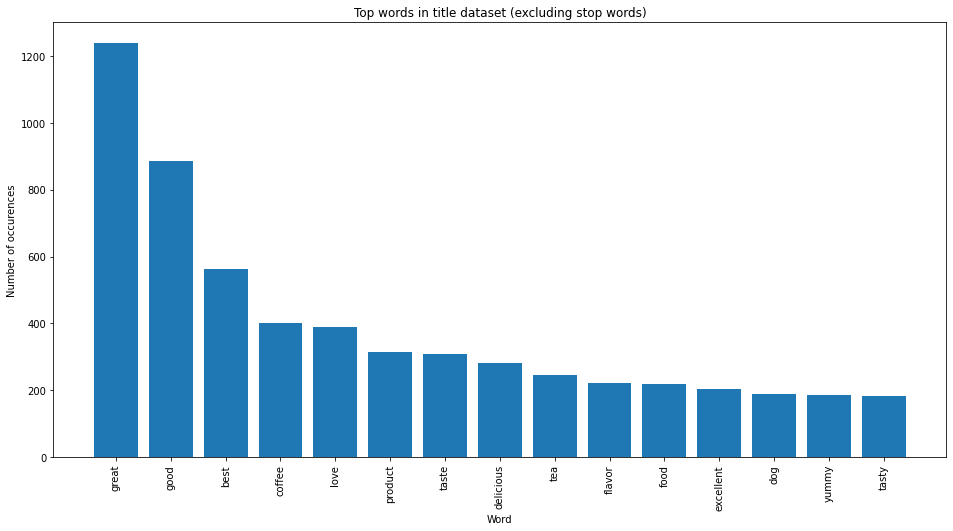

In [242]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [243]:
df.shape[0]

9000

In [244]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [245]:
tagged_tweet = [TextBlob(str(df[i])).pos_tags for i in range(df.shape[0])]

text blob is used to part-of-speech tagging

In [246]:
tagged_tweet_df = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tagged_tweet_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  37253
Mean number of words per tweet:  4.139222222222222


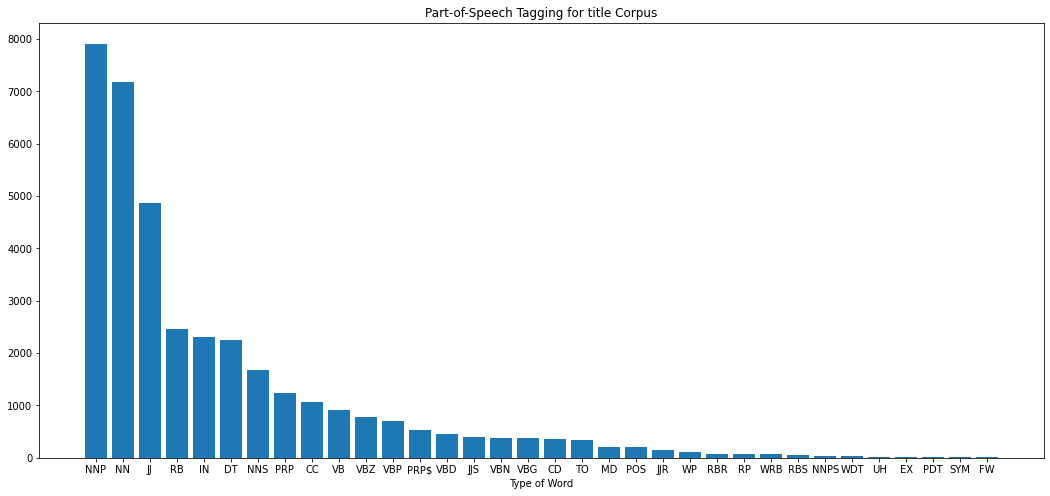

In [247]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [248]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df.sample(n=9000, random_state=0).values.astype('U')

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: Yummy
Text after vectorization: 
  (0, 4153)	1


4 number of topics are selected

In [249]:
n_topics = 5

LSA model

In [250]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [251]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [252]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [253]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        #temp_vector_sum = np.array([temp_vector_sum])
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [254]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  great product taste price tasty snack coffee sweet food little
Topic 2:  good flavor like really just stuff better pretty bad coffee
Topic 3:  best tea dog food hot free loves chips chocolate mix
Topic 4:  love yum cats dogs chips awesome pop disappointed healthy popchips
Topic 5:  coffee delicious yummy excellent wonderful favorite cup nice cups smooth


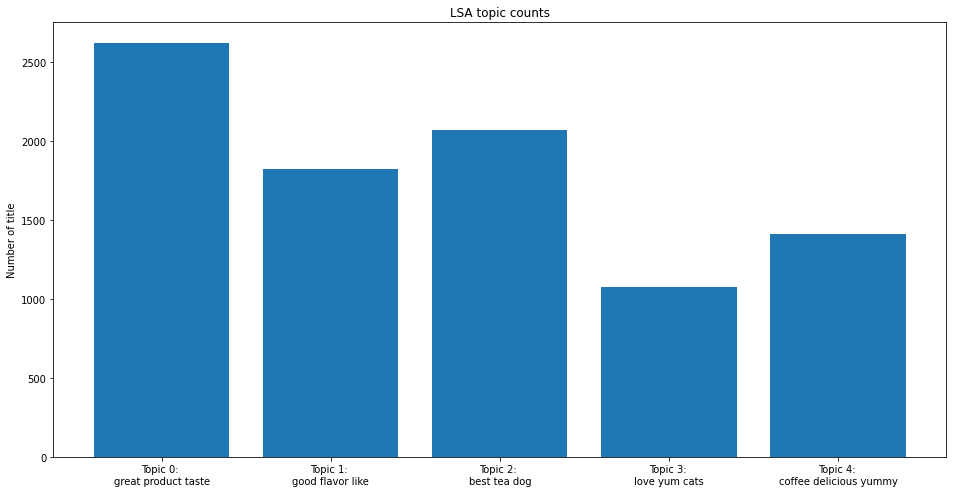

In [255]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [256]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.023s...
[t-SNE] Computed neighbors for 9000 samples in 1.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.252441
[t-SNE] KL divergence after 2000 iterations: 0.551313


In [257]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [258]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [259]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [260]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [261]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [262]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  great product like flavor taste good sweet coffee bad tastes
Topic 2:  delicious excellent hot better chocolate just perfect coffee cup great
Topic 3:  love dog food loves yum great dogs healthy good baby
Topic 4:  good yummy tea taste great chips favorite coffee free price
Topic 5:  best coffee tasty awesome nice cat fresh organic great good


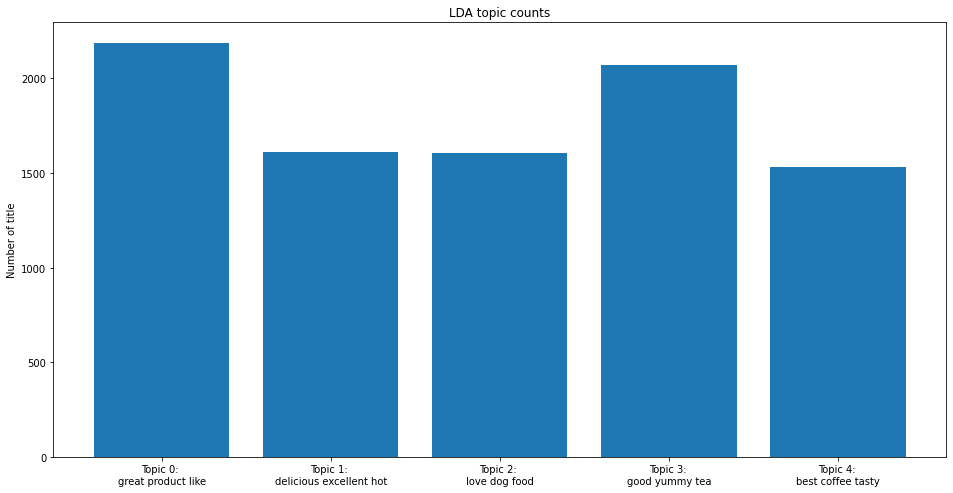

In [263]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [264]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.010s...
[t-SNE] Computed neighbors for 9000 samples in 0.953s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.848358
[t-SNE] KL divergence after 2000 iterations: 0.308495


In [265]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [266]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(0,
  '0.074*"coffee" + 0.054*"best" + 0.028*"tea" + 0.023*"favorite" + 0.011*"kcup" + 0.011*"chip" + 0.010*"wonderful" + 0.009*"mix" + 0.008*"soda" + 0.008*"tasting"'),
 (1,
  '0.135*"great" + 0.041*"taste" + 0.022*"like" + 0.019*"yummy" + 0.013*"nice" + 0.011*"healthy" + 0.010*"decaf" + 0.010*"snack" + 0.009*"quality" + 0.009*"it"'),
 (2,
  '0.106*"good" + 0.031*"flavor" + 0.018*"cup" + 0.013*"price" + 0.013*"stuff" + 0.013*"better" + 0.011*"hot" + 0.011*"awesome" + 0.010*"chocolate" + 0.010*"yum"'),
 (3,
  '0.040*"product" + 0.034*"delicious" + 0.026*"excellent" + 0.023*"tasty" + 0.013*"sweet" + 0.009*"organic" + 0.008*"smooth" + 0.007*"amazing" + 0.007*"juice" + 0.006*"real"'),
 (4,
  '0.061*"love" + 0.033*"dog" + 0.025*"food" + 0.023*"cat" + 0.023*"treat" + 0.013*"perfect" + 0.011*"bad" + 0.010*"it" + 0.007*"baby" + 0.005*"popcorn"')]

In [267]:
pip install gensim

You should consider upgrading via the 'c:\users\satya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [268]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.055925,0.205533,0.238406,0.055951,0.444185,4
1,0.122677,0.507457,0.124124,0.122896,0.122846,1
2,0.088456,0.088876,0.088601,0.449901,0.284166,3
3,0.629620,0.091176,0.090998,0.091715,0.096491,0
4,0.088397,0.645924,0.088231,0.088754,0.088693,1


In [269]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -7.452947467683688

Coherence Score using c_v:  0.5795896721630991

Coherence Score using u_mass:  -15.785372903289254


In [270]:
pip install pyLDAvis

You should consider upgrading via the 'c:\users\satya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [271]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [272]:
lda_viz

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.119390  0.117385       1        1  21.480490
0     -0.171897  0.054232       2        1  21.237144
2      0.030069 -0.147116       3        1  20.543663
4      0.011893 -0.007672       4        1  18.717883
3      0.010545 -0.016828       5        1  18.020820, topic_info=           Term        Freq       Total Category  logprob  loglift
9         great  711.000000  711.000000  Default  30.0000  30.0000
2          good  535.000000  535.000000  Default  29.0000  29.0000
128      coffee  389.000000  389.000000  Default  28.0000  28.0000
26         love  279.000000  279.000000  Default  27.0000  27.0000
19         best  281.000000  281.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
366         use   19.288215   23.183128   Topic5  -5.4319   1.5297
146  convenient   14.808587   18.646561   Topic5  -5.6962   1.4832
340        easy   23.462532   40.510296   Topic5  -5.2360   1.1675
397       drink   23.702679   42.263494   Topic5  -5.2259   1.1353
268      little   17.630315   41.324795   Topic5  -5.5218   0.8618

[199 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
412       1  0.063084  absolutely
412       2  0.063084  absolutely
412       3  0.063084  absolutely
412       4  0.063084  absolutely
412       5  0.883177  absolutely
...     ...       ...         ...
34        1  0.981906       yummy
34        2  0.010019       yummy
34        3  0.010019       yummy
34        4  0.010019       yummy
34        5  0.010019       yummy

[825 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 5, 4])

In [273]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)


c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.949*"great" + 0.150*"good" + 0.143*"product" + 0.121*"taste" + 0.095*"coffee" + 0.090*"price" + 0.059*"food" + 0.048*"dog" + 0.042*"flavor" + 0.042*"tea"'),
 (1,
  '-0.961*"good" + 0.197*"great" + -0.098*"taste" + -0.088*"coffee" + -0.058*"flavor" + -0.049*"pretty" + -0.047*"stuff" + -0.036*"best" + -0.034*"product" + -0.031*"price"'),
 (2,
  '0.678*"love" + 0.616*"best" + 0.208*"dog" + 0.160*"coffee" + 0.150*"it" + 0.132*"food" + -0.095*"good" + 0.080*"cat" + -0.078*"great" + 0.070*"ever"'),
 (3,
  '-0.714*"best" + 0.629*"love" + -0.171*"coffee" + 0.137*"it" + 0.127*"dog" + -0.083*"ever" + 0.065*"cat" + -0.041*"ive" + 0.040*"food" + -0.032*"hot"')]

In [274]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score for LSI using c_v:  0.545858096841529

Coherence Score for LSI using u_mass:  -13.592231904583688


Compare two models

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


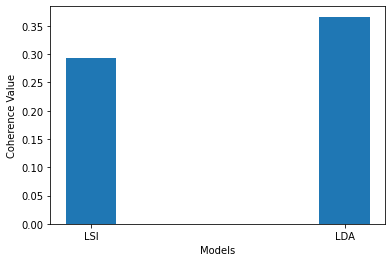

In [275]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])